In [1]:
# %env PYTORCH_ENABLE_MPS_FALLBACK=1
%load_ext autoreload
%autoreload

from bins import Bins
from utils import calcOneChi2, HistMaker_1d, diffHist, setOPT_text, setTH1, setPad, geomAvg1d
from ROOT import TFile, TH1, TH3F, TF2, TF1, TCanvas, TStyle, gStyle, Form, Fit, TLegend
import scipy.optimize as opt
import math
import calendar, os
from time import time, gmtime

Welcome to JupyROOT 6.28/04


In [2]:
gStyle.SetOptStat(0)

ag1580ag = True
event_mixing = False
read_saved = True
range_used = range(0,12)

if read_saved:
    if event_mixing:
        if ag1580ag:
            DIR_NAME = "results_mixing_nu15_noise1em1_1d_ag1580ag"
        else:
            DIR_NAME = "results_mixing_nu15_noise1em1_1d"
    else:
        if ag1580ag:
            DIR_NAME = "results_sameevt_nu15_noise1em1_1d_ag1580ag"
        else:
            DIR_NAME = "results_sameevt_nu15_noise1em1_1d"
else:
    current_GMT =   gmtime()
    time_stamp = calendar.timegm(current_GMT)
    DIR_NAME = f'results_{time_stamp}'
    os.mkdir(DIR_NAME)

In [3]:
ag1580ag = True

if ag1580ag:
    filename_data_np = "063_088_ag158ag_3200A_accepted_np.dat"
    filename_data_pp = "063_088_ag158ag_3200A_accepted_pp.dat"
    filename_data_nn = "063_088_ag158ag_3200A_accepted_nn.dat"
    filename_data_np_mix = "063_088_ag158ag_3200A_accepted_np_mix_hc.dat"
    filename_data_pp_mix = "apr12_diele_086_ag158ag_3200A_accepted_1_pp_mix_hc.dat"
    filename_data_nn_mix = "apr12_diele_086_ag158ag_3200A_accepted_1_nn_mix_hc.dat"
    filename_MC_rho = "mar19_diele_inmedium_heli0cm_ag1580ag_np.dat"
    filename_MC_pi0 = "mar19_diele_pi0_heli0cm_ag1580ag_np.dat"
    filename_MC_mix = "mar19_diele_pi0_heli0cm_ag1580ag_np_mix.dat"
else:
    filename_data_np = "apr12_diele_088_090_ag123ag_2500A_accepted_np_2.dat"
    filename_data_pp = "088_090_ag123ag_2500A_accepted_pp.dat"
    filename_data_nn = "088_090_ag123ag_2500A_accepted_nn.dat"
    filename_data_np_mix = "088_090_ag123ag_2500A_accepted_np_mix_hc.dat"
    filename_data_pp_mix = "088_090_ag123ag_2500A_accepted_pp_mix_hc.dat"
    filename_data_nn_mix = "088_090_ag123ag_2500A_accepted_nn_mix_hc.dat"
    filename_MC_rho = "mar19_diele_inmedium_heli0cm_np.dat"
    filename_MC_pi0 = "mar19_diele_pi0_heli0cm_ag1580ag_np.dat.dat"
    filename_MC_mix = "mar19_diele_pi0_heli0cm_np_mix.dat"




bins = Bins.readFrom("ranges.yml")
#histMakerData_np = HistMaker_1d("apr12_diele_088_090_ag123ag_2500A_accepted_np_mix_hc_sample_2.dat", "_data", bins)
if event_mixing:
    histMakerData_np = HistMaker_1d(filename_data_np_mix, "_data_np", bins)
else:
    histMakerData_np = HistMaker_1d(filename_data_np, "_data_np", bins)
histsData_np = histMakerData_np.makeHists()
histMakerData_pp = HistMaker_1d(filename_data_pp, "_data_pp", bins)
histsData_pp = histMakerData_pp.makeHists()
histMakerData_nn = HistMaker_1d(filename_data_nn, "_data_nn", bins)
histsData_nn = histMakerData_nn.makeHists()

histMakerData_np_mix = HistMaker_1d(filename_data_np_mix, "_data_pp_mix", bins)
histsData_np_mix = histMakerData_np_mix.makeHists()
histMakerData_pp_mix = HistMaker_1d(filename_data_np_mix, "_data_pp_mix", bins)
histsData_pp_mix = histMakerData_pp_mix.makeHists()
histMakerData_nn_mix = HistMaker_1d(filename_data_nn_mix, "_data_nn_mix", bins)
histsData_nn_mix = histMakerData_nn_mix.makeHists()

histMakerMC_rho = HistMaker_1d(filename_MC_rho, "_MC_rho", bins)
histMakerMC_pi0 = HistMaker_1d(filename_MC_pi0, "_MC_pi0", bins)
histMakerMC_mix = HistMaker_1d(filename_MC_mix, "_MC_mix", bins)
#histMakerMC_mix = HistMaker_1d("test_inmedium_heli0cm_np_mix.dat", "_MC_rho_mix", bins)
#histMakerMC_mix = HistMaker_1d("mar19_diele_pi0_heli0cm_np_mix.dat", "_MC_rho_mix", bins)
def getHistMakerMC(HIST_INDEX):
    if event_mixing:
        return histMakerMC_mix
    else:
        return histMakerMC_pi0 if HIST_INDEX < 3 else histMakerMC_rho


iter 0
#1 [[<cppyy.gbl.TH1F object at 0x1644e22a0>, <cppyy.gbl.TH1F object at 0x1644e49d0>, <cppyy.gbl.TH1F object at 0x1644e4dc0>, <cppyy.gbl.TH1F object at 0x1644e51b0>, <cppyy.gbl.TH1F object at 0x1644e55a0>, <cppyy.gbl.TH1F object at 0x1644e5990>, <cppyy.gbl.TH1F object at 0x1644e5d80>, <cppyy.gbl.TH1F object at 0x1644e6170>, <cppyy.gbl.TH1F object at 0x1644e6560>, <cppyy.gbl.TH1F object at 0x1644e6950>, <cppyy.gbl.TH1F object at 0x1644e6d40>, <cppyy.gbl.TH1F object at 0x1644e7130>], [<cppyy.gbl.TH1F object at 0x1644e7520>, <cppyy.gbl.TH1F object at 0x1644e7d00>], [<cppyy.gbl.TH1F object at 0x1644e7910>, <cppyy.gbl.TH1F object at 0x1644e80f0>]]
#2 [[<cppyy.gbl.TH1F object at 0x1644ea030>, <cppyy.gbl.TH1F object at 0x1644ea420>, <cppyy.gbl.TH1F object at 0x1644ea810>, <cppyy.gbl.TH1F object at 0x1644eac00>, <cppyy.gbl.TH1F object at 0x1644eaff0>, <cppyy.gbl.TH1F object at 0x1644eb3e0>, <cppyy.gbl.TH1F object at 0x1644eb7d0>, <cppyy.gbl.TH1F object at 0x1644ebbc0>, <cppyy.gbl.TH1F ob

Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_m06p00_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p00p03_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_0to150_p03p08_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_150to300_m06p00_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_150to300_p00p03_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_150to300_p03p08_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_300to450_m06p00_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_300to450_p00p03_data_pp_mix_iter4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_300to450_p03p08_data_

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/base_hists_pi0_MC.gif has been created


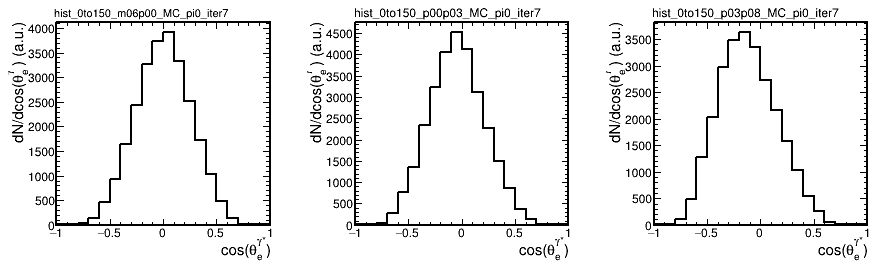

In [4]:
base_hists_pi0 = histMakerMC_pi0.builder.base_hists
can3 = TCanvas("can3","can3",900,300)
can3.Divide(3,1)
can3.Draw()
for i, hist in enumerate(base_hists_pi0[0]):
    if i < 3:
        pad = can3.cd(i+1)
        setPad(pad)

        if not isinstance(hist, list):
            hist.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
            setTH1(hist, hist.GetXaxis().GetTitle(), f"dN/d{hist.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
            hist.Draw()
        else:
            print(hist)
can3.SaveAs(f"{DIR_NAME}/base_hists_pi0_MC.gif")

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/base_hists_rho_MC.gif has been created


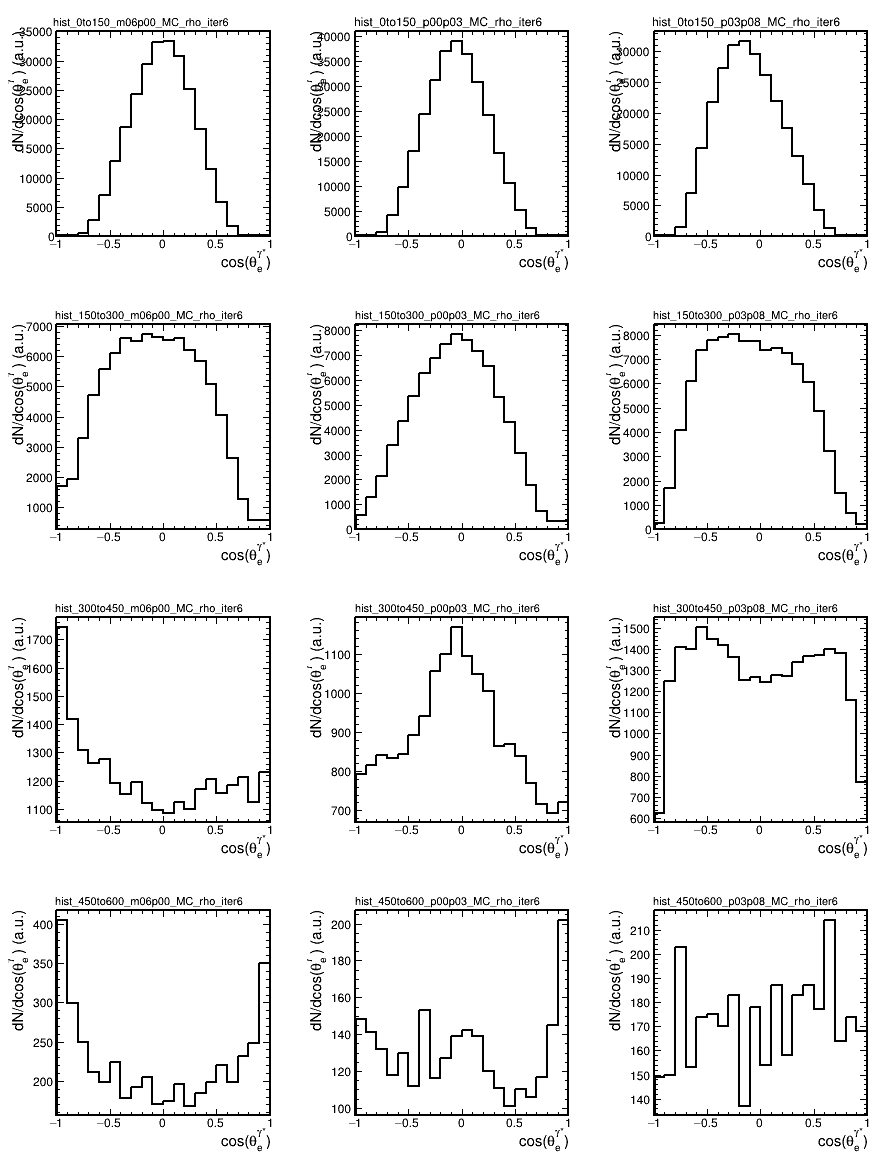

In [5]:
base_hists_rho = histMakerMC_rho.builder.base_hists
can5 = TCanvas("can5","can5",900,1200)
can5.Divide(3,4)
can5.Draw()
for i, hist in enumerate(base_hists_rho[0]):
    pad = can5.cd(i+1)
    setPad(pad)
    if not isinstance(hist, list):
        hist.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
        setTH1(hist, hist.GetXaxis().GetTitle(), f"dN/d{hist.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
        hist.Draw()
    else:
        print(hist)
can5.SaveAs(f'{DIR_NAME}/base_hists_rho_MC.gif')


Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/histsData_np.gif has been created


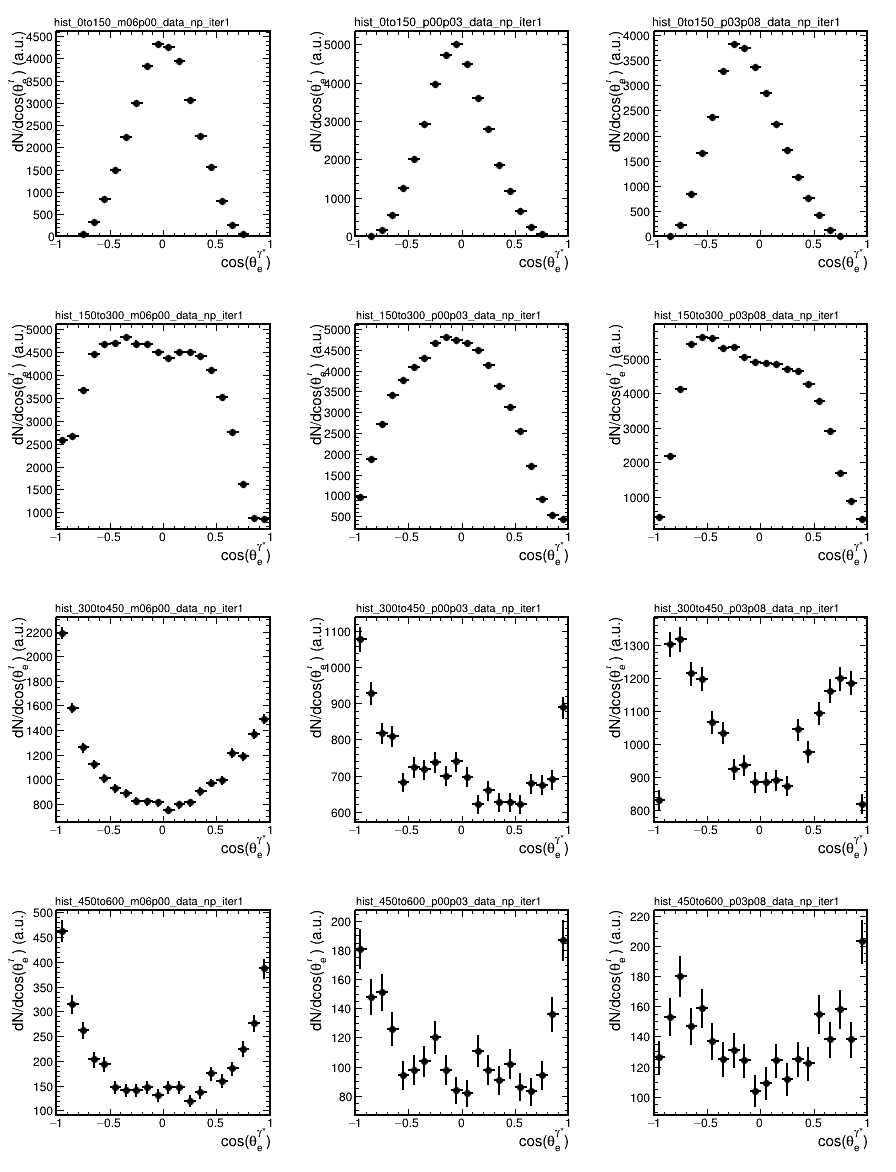

In [6]:
can4 = TCanvas("can4","can4",900,1200)
can4.Divide(3,4)
can4.Draw()
for i, hist in enumerate(histsData_np[0]):
    pad = can4.cd(i+1)
    setPad(pad)
    if not isinstance(hist, list):
        hist.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
        setTH1(hist, hist.GetXaxis().GetTitle(), f"dN/d{hist.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
        hist.Draw()
    else:
        print(hist)

can4.SaveAs(f'{DIR_NAME}/histsData_np.gif')

In [7]:
import torch

torch.device("mps")
torch.manual_seed(0)

import gpytorch
import botorch

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (8, 6)

from tqdm.notebook import tqdm

import warnings

In [8]:
TH1.SetDefaultSumw2

gpytorch.settings.fast_pred_var()
gpytorch.settings.fast_pred_samples()

N_PARAMS = 1

In [9]:
torch.backends.mps.is_available()
#mps_device = torch.device("mps")
mps_device = torch.device("cpu")
bounds = torch.tensor([[-1, ],
                       [ 1, ]], dtype=torch.float)
bounds = bounds.to(mps_device)


xs = torch.linspace(bounds[0][0], bounds[1][0], 101)

In [10]:
class GPModel(gpytorch.models.ExactGP, botorch.models.gpytorch.GPyTorchModel):
# class GPModel(gpytorch.models.ApproximateGP, botorch.models.gpytorch.GPyTorchModel):
    _num_outputs = 1

    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.MaternKernel(nu=1.5, ard_num_dims=1)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        mean_x = mean_x.to(mps_device)
        covar_x = covar_x.to(mps_device)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

def fit_gp_model(train_x, train_y, num_train_iters=500):
    train_x = train_x.to(mps_device)
    train_y = train_y.to(mps_device)

    # declare the GP
    noise = 1e-1

    likelihood = gpytorch.likelihoods.StudentTLikelihood()
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = GPModel(train_x, train_y, likelihood)
    model.likelihood.noise = noise
    likelihood = likelihood.to(mps_device)
    model = model.to(mps_device)

    # train the hyperparameter (the constant)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    model.train()
    likelihood.train()

    for i in range(num_train_iters):
        optimizer.zero_grad()

        output = model(train_x)
        loss = -mll(output, train_y)

        loss.backward()
        
        optimizer.step()

    model.eval()
    likelihood.eval()

    return model.cpu(), likelihood.cpu()

In [11]:
# TODO: Come back to standard version
#num_queries = 75
num_queries = 200
num_repeats = 1
num_samples = 20

In [12]:
# -2 is the default value when no feasible has been found
default_value = -1

def fit_bo(HIST_INDEX = 0):
    global bounds

    def objective(xx):
        def generator(xx):
            for x in xx:
                lambda_theta = x

                histsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
                chi2, ndf = calcOneChi2(histsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX])
                allHistsMC.append(histsMC[0][HIST_INDEX])
                if not chi2 or not ndf:
                    return torch.tensor([0])
                yield torch.tensor([1.0/(chi2 / ndf)])
        return torch.stack([a for a in generator(xx)])

    def one_starting_sample():
        result = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(N_PARAMS)
        return result

    feasible_incumbents = torch.ones((num_repeats, num_queries)) * default_value

    best_fs = []

    print(f"HIST INDEX: {HIST_INDEX}")
    for trial in range(num_repeats):
       # print("trial", trial)

        torch.manual_seed(trial)
       # train_x = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(num_samples, 3)
       # while -2.0*train_x[0][0] - 1.0*train_x[0][2] < -2:
       #     train_x = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(num_samples, 3)
        train_x = torch.stack([one_starting_sample() for _ in range(num_samples)])
        train_utility = objective(train_x).to(mps_device)
        train_x = train_x.to(mps_device)

        for i in tqdm(range(num_queries)):
            feasible_incumbents[trial, i] = train_utility.max()
            before_fit_gp = time()
            utility_model, utility_likelihood = fit_gp_model(
                train_x, train_utility.squeeze(-1)
            )
            after_fit_gp = time()
           # print("Fitting GP took " + str(after_fit_gp - before_fit_gp) + " seconds")
            best_f = train_utility.max()
            best_fs.append(best_f.item())
                
           # policy = botorch.acquisition.monte_carlo.qExpectedImprovement(
           # policy = botorch.acquisition.analytic.LogExpectedImprovement(
            policy = botorch.acquisition.logei.qLogExpectedImprovement(
          # policy = botorch.acquisition.analytic.LogProbabilityOfImprovement(
          # policy = botorch.acquisition.analytic.PosteriorMean(
                model=utility_model,
                best_f=train_utility.max(),
            ).to(mps_device)

            before_optimize_acqf = time()
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore', category=RuntimeWarning)
                next_x, acq_val = botorch.optim.optimize_acqf(
                    policy,
                    bounds=bounds,
                    #q=5,
                    #num_restarts=5,
                    #raw_samples=400,
                    q=1,
                    num_restarts=40,
                    raw_samples=100,
                )
            after_optimize_acqf = time()
           # print("Optimizing ACQF took " + str(after_optimize_acqf - before_optimize_acqf) + " seconds")

            next_utility = objective(next_x).to(mps_device)

            train_x = torch.cat([train_x, next_x])
            train_utility = torch.cat([train_utility, next_utility])
    torch.save(feasible_incumbents, f"{DIR_NAME}/incumbents_" + str(HIST_INDEX) + ".pth")
    fout = TFile(f"{DIR_NAME}/out_{HIST_INDEX}.root","RECREATE")
    fout.cd()
    for hist in allHistsMC:
       # print ("Writing hist: ", hist.GetName())
        hist.Write()
    for j, hists in enumerate(histsData_np):
        for k, hist in enumerate(hists):
                hist.Write()
               # print ("Writing hist: ", j, k, hist)
    fout.Close()

    with torch.no_grad():
        predictive_distribution = utility_likelihood(utility_model(xs))
        acquisition_score = policy(xs.unsqueeze(1))

    lambda_thetas     = train_x.flatten()
    
    c = torch.stack((
        torch.arange(0,num_queries, dtype=int),
        lambda_thetas[0:num_queries],
        train_utility.squeeze()[0:num_queries],
        (feasible_incumbents==feasible_incumbents.max())[0],
        feasible_incumbents[0]
    ),0).transpose(-2,-1)
    torch.set_printoptions(precision=4,threshold=10_000, linewidth=120)
    sort_index = c[:, N_PARAMS + 1].sort()[1]
    c_sorted = c[sort_index]
    train_x_sorted = train_x[sort_index]

    return c_sorted, train_x_sorted, predictive_distribution

In [13]:
c_sorted_all = []
train_x_sorted_all = []
predictive_mean_all = []
predictive_lower_all = []
predictive_upper_all = []

for HIST_INDEX in range_used:
    allHistsMC = []
    if read_saved:
        c_sorted = torch.load(f"{DIR_NAME}/c_sorted_" + str(HIST_INDEX) + ".pth")
        train_x_sorted = torch.load(f"{DIR_NAME}/train_x_sorted_" + str(HIST_INDEX) + ".pth")
        predictive_distribution = torch.load(f"{DIR_NAME}/predictive_distribution_" + str(HIST_INDEX) + ".pth")

        file = TFile(f"{DIR_NAME}/out_{HIST_INDEX}.root", "read")
        names = [key.GetName() for key in file.GetListOfKeys()]
        names = [name for name in names if "MC" in name]
        for name in names:
            allHistsMC.append(file.Get(name))
    else:
        c_sorted, train_x_sorted, predictive_distribution = fit_bo(HIST_INDEX)
        print(c_sorted[-5:])
        
        torch.save(c_sorted, f"{DIR_NAME}/c_sorted_" + str(HIST_INDEX) + ".pth")
        torch.save(train_x_sorted, f"{DIR_NAME}/train_x_sorted_" + str(HIST_INDEX) + ".pth")
        torch.save(predictive_distribution, f"{DIR_NAME}/predictive_distribution_" + str(HIST_INDEX) + ".pth")

    predictive_mean = predictive_distribution.mean
    predictive_lower, predictive_upper = predictive_distribution.confidence_region()
    print("AFTER_READING: ", predictive_mean[100], predictive_lower[100], predictive_upper[100])

    c_sorted_all.append(c_sorted)
    train_x_sorted_all.append(train_x_sorted)
    predictive_mean_all.append(predictive_mean)
    predictive_lower_all.append(predictive_lower)
    predictive_upper_all.append(predictive_upper)



AFTER_READING:  tensor(0.1292) tensor(0.0717) tensor(0.1868)
AFTER_READING:  tensor(0.1251) tensor(0.0676) tensor(0.1826)
AFTER_READING:  tensor(0.1570) tensor(0.0995) tensor(0.2145)
AFTER_READING:  tensor(0.0677) tensor(0.0102) tensor(0.1252)
AFTER_READING:  tensor(0.0388) tensor(-0.0187) tensor(0.0962)
AFTER_READING:  tensor(0.0731) tensor(0.0156) tensor(0.1306)
AFTER_READING:  tensor(0.3231) tensor(0.2635) tensor(0.3826)
AFTER_READING:  tensor(0.3783) tensor(0.3204) tensor(0.4361)
AFTER_READING:  tensor(0.1845) tensor(0.1058) tensor(0.2632)
AFTER_READING:  tensor(0.4865) tensor(0.4057) tensor(0.5674)
AFTER_READING:  tensor(0.2873) tensor(0.2108) tensor(0.3638)
AFTER_READING:  tensor(0.2802) tensor(0.2034) tensor(0.3570)


In [14]:
from ipywidgets import interact, Layout, IntSlider, FloatSlider
import numpy as np

axis_title = r"$cos(\theta_e^{\gamma*})$"

def oneplot(ax, tensor, title):
        
        global xs
        
       # pos = ax.plot(xs, tensor, ymin=0, ymax=tensor.max())
        pos = ax.plot(xs, tensor)
       # ax.set_aspect((extent[1]-extent[0])/(extent[3]-extent[2]))
        ax.set_title(title)
        ax.set_xlabel(axis_title)

can_cmp_ind = 0

def plotComparison(can, pad_nr1, pad_nr2, histMC, histData, hist_index, pull_title):
   # print(f"PLOTTING: {histMC.GetName()} and {histData.GetName()}")
    global can_cmp_ind

    curr_bin = bins[hist_index]
    title = f"{curr_bin.m_min} < #it{{M}}_{{ee}} < {curr_bin.m_max}, {curr_bin.z_min} < cos(#theta^{{CM}}_{{#gamma*}}) < {curr_bin.z_max}"
    
    pad = can.cd(pad_nr1)
    setPad(pad)
    pad.SetRightMargin(0.16)
    histData.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
    histData.SetTitle(title)
    setTH1(histData, histData.GetXaxis().GetTitle(), f"dN/d{histData.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
    histData.Draw()
    histMC.Scale(histData.Integral()/histMC.Integral())
    histMC.SetLineColor(2)
    histMC.Draw("SAMEHIST")
    pad = can.cd(pad_nr2)
    setPad(pad)
    pad.SetRightMargin(0.16)
    hdiff = diffHist(histMC, histData)
    hdiff.SetTitle(pull_title)
    setTH1(hdiff, hdiff.GetXaxis().GetTitle(), "Pull value", 505, 20, 0.8, 2)
    hdiff.Draw("HIST")
    can.Update()
    can.Modified()
    can.Update()
    
    return hdiff

def xAxisProperties(histMC, histData):
    n = 0
    meanX2 = 0
    for i, (c1, c2) in enumerate(zip(histMC, histData)):
        if c1 != 0 and c2 != 0:
            n = n + 1
            meanX2 = meanX2 + math.pow(histMC.GetBinCenter(i+1), 2)
    if n > 0:
        meanX2 = meanX2 / n
    varX2 = 0
    sigma2 = 0
    for i, (c1, c2) in enumerate(zip(histMC, histData)):
        if c1 != 0 and c2 != 0:
            center = histData.GetXaxis().GetBinCenter(i+1)
            varX2 = varX2 + math.pow(math.pow(center, 2) - meanX2, 2)
            sigma2 = sigma2 + math.pow((c2 - c1)/c1 , 2)
    if n > 2:
        sigma2 = sigma2/(n-2)
    return n, varX2, sigma2

In [15]:
def bin_index(x, min, max):
        return int((x-min)/(max-min)*101)

def covariance_fit_scipy(predictive_mean, predictive_lower, predictive_upper, best, HIST_INDEX, ax):
    def gaus1d(x, A, mean_x, sigma_x):
        x = x - mean_x
        z = A * np.exp( -0.5 * (x/sigma_x) ** 2 )
        return z
    def gaus1d_offset(x, A, mean_x, sigma_x, offset):
        x = x - mean_x
        z = offset + A * np.exp( -0.5 * (x/sigma_x) ** 2 )
        return z

    def fit_1d(ax):
        curr_bin = bins[HIST_INDEX]
        title = f"{curr_bin.m_min} < $M_{{ee}}$ < {curr_bin.m_max}, {curr_bin.z_min} < $cos(\\theta^{{CM}}_{{\gamma*}})$ < {curr_bin.z_max}"
        
        mean_x = best[0].item()

        scale1 = bounds[1][0].item()
        scale2 = bounds[1][0].item()
        proj_min_X = bounds[0][0].item()
        proj_max_X = bounds[1][0].item()

        proj = predictive_mean
        proj_lower = predictive_lower
        proj_upper = predictive_upper

       # xmin_ind = max(0,   bin_index(mean_x, proj_min_X, proj_max_X)-50)
       # xmax_ind = min(100, bin_index(mean_x, proj_min_X, proj_max_X)+50)
        xmin_ind = 0
        xmax_ind = 100
        xmin = proj_min_X + xmin_ind / 101. * (proj_max_X - proj_min_X)
        xmax = proj_min_X + (xmax_ind + 1) / 101. * (proj_max_X - proj_min_X)

        x = np.linspace(-1, 1, 101)

        proj1 = proj[xmin_ind:xmax_ind]
        print("range ", xmin_ind, xmax_ind, xmin, xmax)
    
       # initial_guess = (1.0, mean_x, 0.2*(proj_max_X-proj_min_X))
        initial_guess = (1.0, mean_x, 0.2*(proj_max_X-proj_min_X), 0)
        eps = 0.001
       # param_bounds = ([0,mean_x-eps,0],[np.inf,mean_x+eps,2])
       # if mean_x >= 1.0:
       #     param_bounds = ([0,mean_x-eps,0],[np.inf,2,2])
        param_bounds = ([0,mean_x-eps,0,-np.inf],[np.inf,mean_x+eps,2,np.inf])
        if mean_x >= 1.0:
            param_bounds = ([0,mean_x-eps,0,-np.inf],[np.inf,2,2,np.inf])
       # ax.plot(x, proj, label="Estimated values")
        ax.plot(x, proj)
        ax.fill_between(x, proj_lower, proj_upper, alpha=0.5)
        ax.plot(x, proj, label="Estimated values")
        ax.set_title(title)
        ax.set_xlabel(r"$\lambda_{\theta}$")
        ax.set_ylabel("ndf$/\chi^2$")
        ax.set_ylim(0,1.5*proj_upper.max())
        try:
            popt, pcov = opt.curve_fit(gaus1d_offset, x[xmin_ind:xmax_ind], proj1, p0 = initial_guess, bounds=param_bounds, maxfev=2000)
            fit_result = gaus1d_offset(x, *(popt))
    
            ax.plot(x, fit_result, label="Gaussian fit")
           # ax.set_ylim([0,2*predictive_upper.max()])
           # plt.rc('axes', titlesize=8)
           # plt.rc('axes', labelsize=8) 
           # plt.rc('xtick', labelsize=8)
           # plt.rc('ytick', labelsize=8)
            ax.legend()
        except RuntimeError as e:
            print(f"There was an exception {e}")
            popt, pcov = None, None
        return popt, pcov

   # params0, _ = fit_1d(ax[1][0])
    params0, _ = fit_1d(ax)
    plt.savefig(f"{DIR_NAME}/chi2_best_{HIST_INDEX}.png", bbox_inches="tight")

    try:
        return params0[1], params0[2]
    except:
        return None

#2 [[<cppyy.gbl.TH1F object at 0x1617918e0>, <cppyy.gbl.TH1F object at 0x451e6a160>, <cppyy.gbl.TH1F object at 0x451e6a550>, <cppyy.gbl.TH1F object at 0x451e6a940>, <cppyy.gbl.TH1F object at 0x451e6ad30>, <cppyy.gbl.TH1F object at 0x451e6b120>, <cppyy.gbl.TH1F object at 0x451e6b8f0>, <cppyy.gbl.TH1F object at 0x451e6bce0>, <cppyy.gbl.TH1F object at 0x451e6c0d0>, <cppyy.gbl.TH1F object at 0x451e6c4c0>, <cppyy.gbl.TH1F object at 0x451e6c8b0>, <cppyy.gbl.TH1F object at 0x451e6cca0>], [<cppyy.gbl.TH1F object at 0x2b0c0b2b0>, <cppyy.gbl.TH1F object at 0x2b0c0ba90>], [<cppyy.gbl.TH1F object at 0x2b0c0b6a0>, <cppyy.gbl.TH1F object at 0x2b0c0be80>]]
#2 [[<cppyy.gbl.TH1F object at 0x461e22e90>, <cppyy.gbl.TH1F object at 0x461e23280>, <cppyy.gbl.TH1F object at 0x461e23670>, <cppyy.gbl.TH1F object at 0x461e23a60>, <cppyy.gbl.TH1F object at 0x461e23e50>, <cppyy.gbl.TH1F object at 0x461e24240>, <cppyy.gbl.TH1F object at 0x461e24630>, <cppyy.gbl.TH1F object at 0x461e24a20>, <cppyy.gbl.TH1F object at

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_0.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_1.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_3.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_4.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_6.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_7.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_8.gif has been 

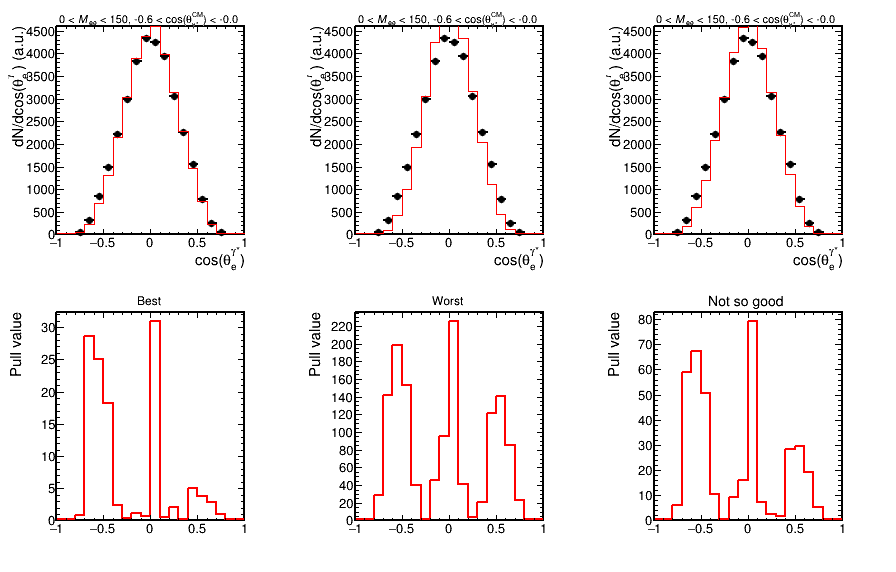

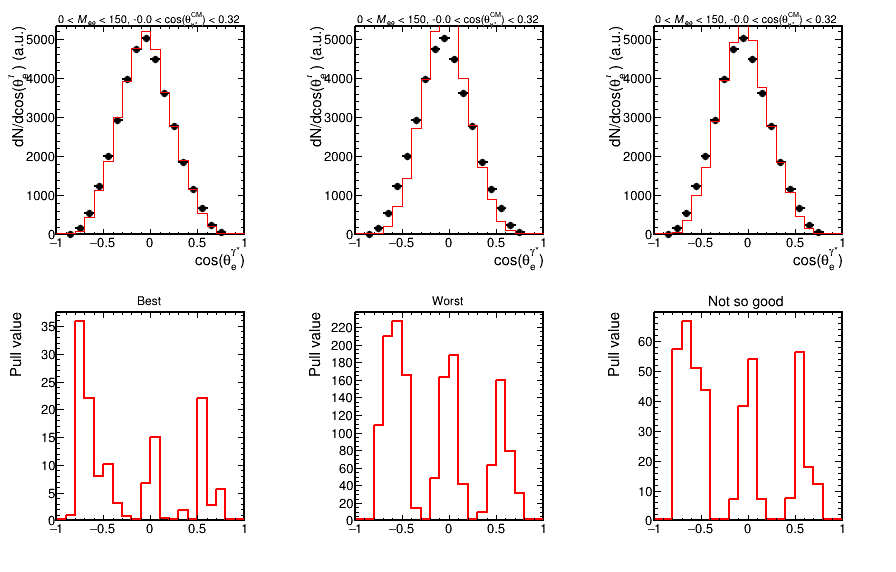

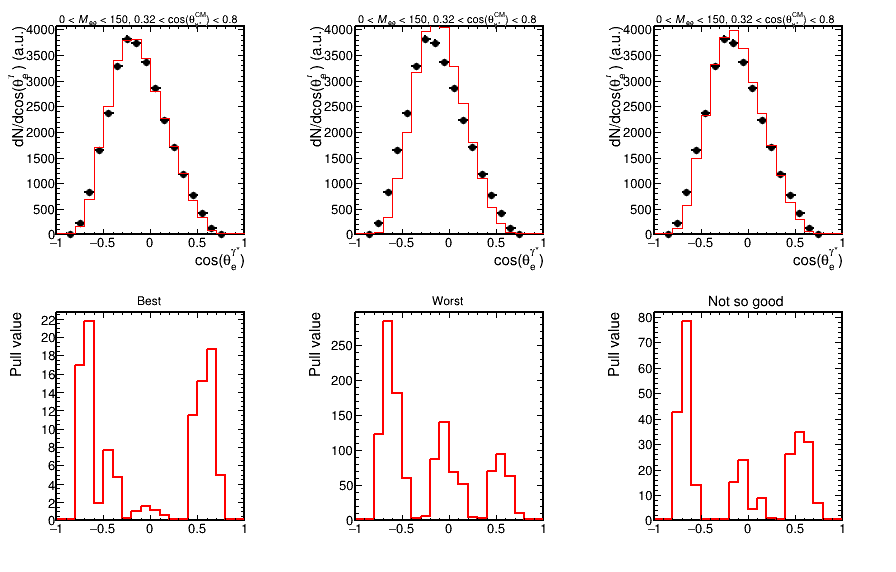

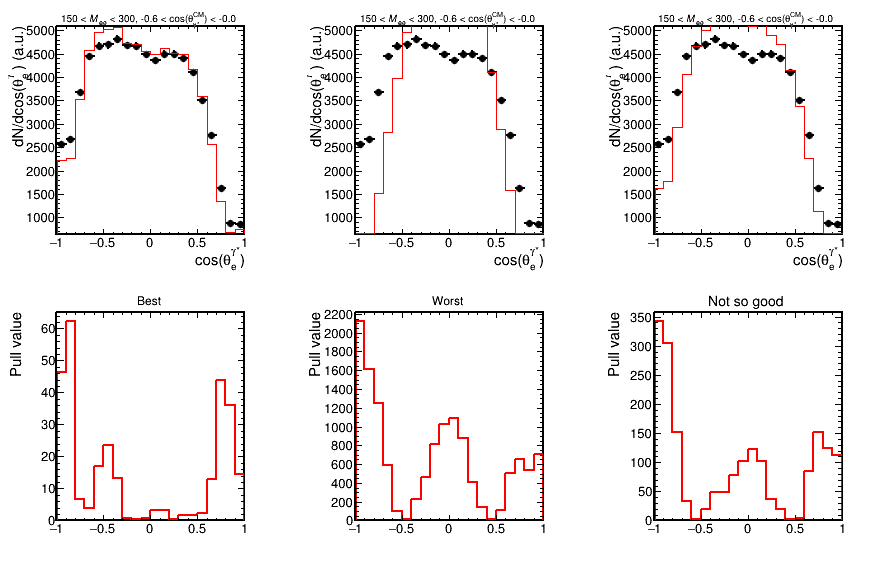

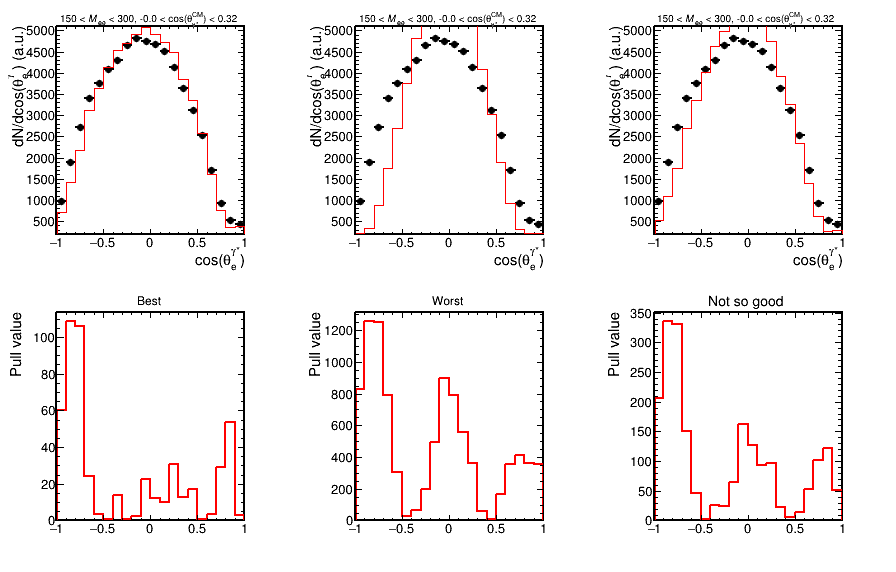

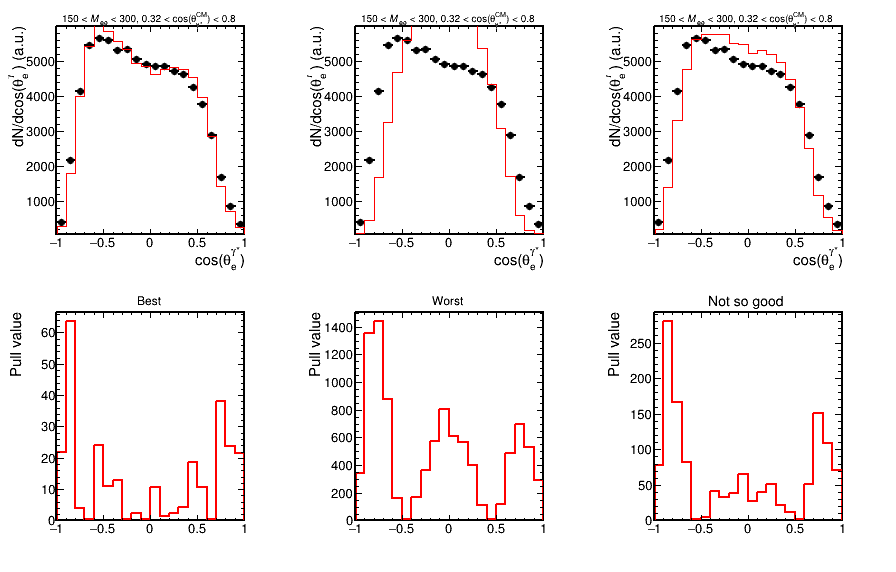

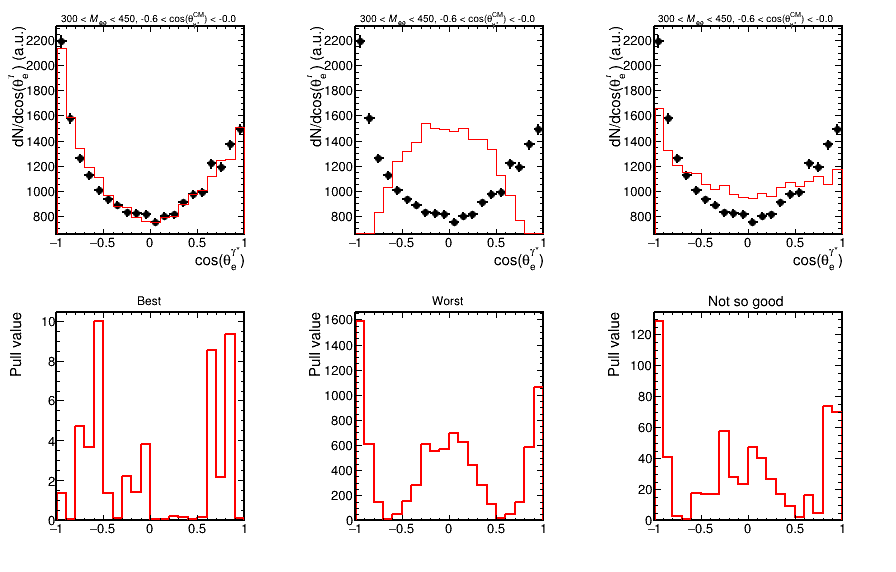

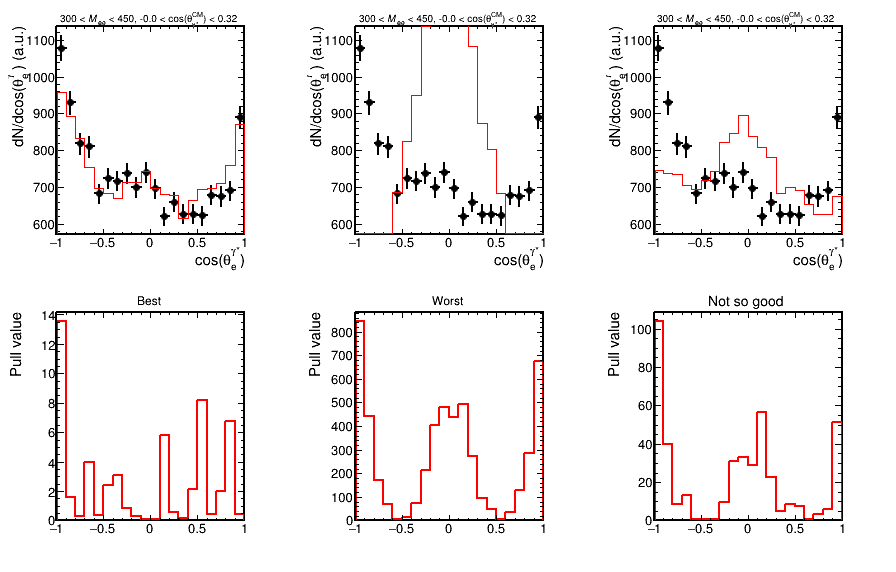

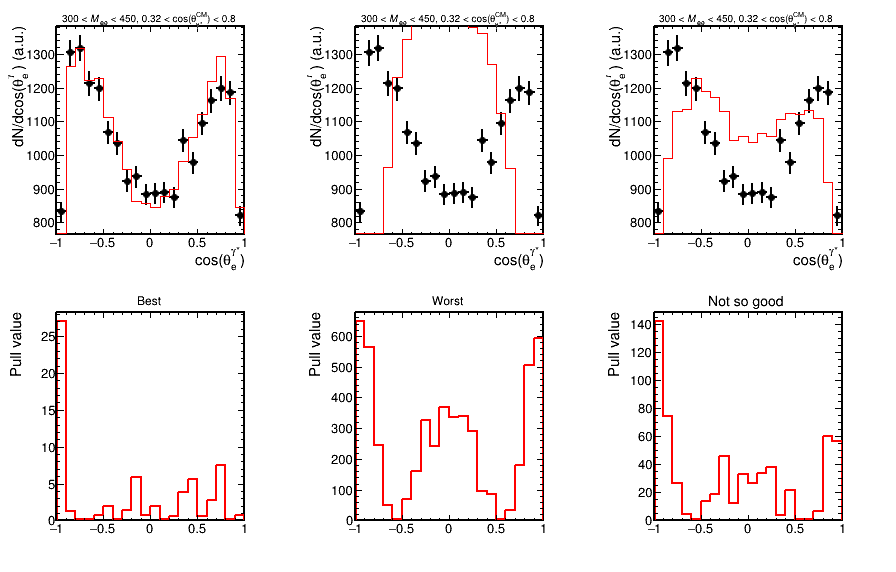

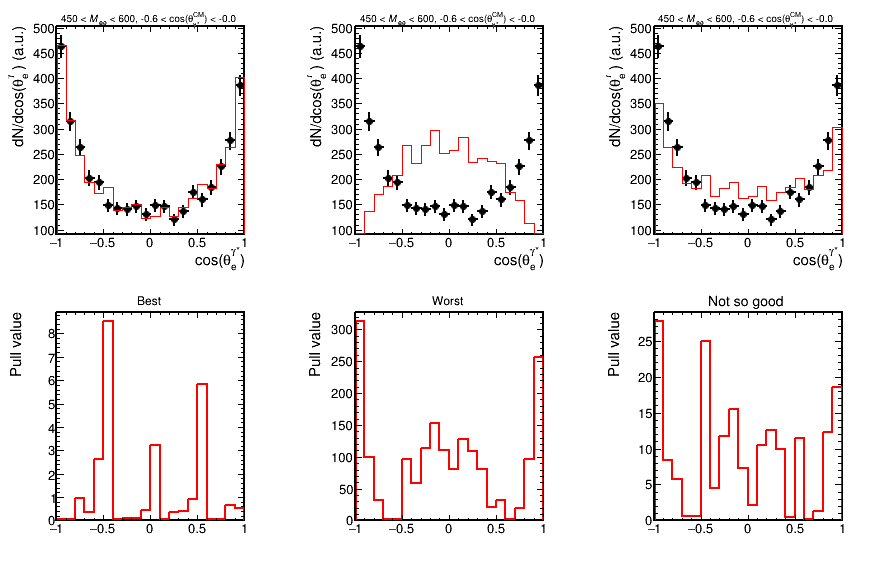

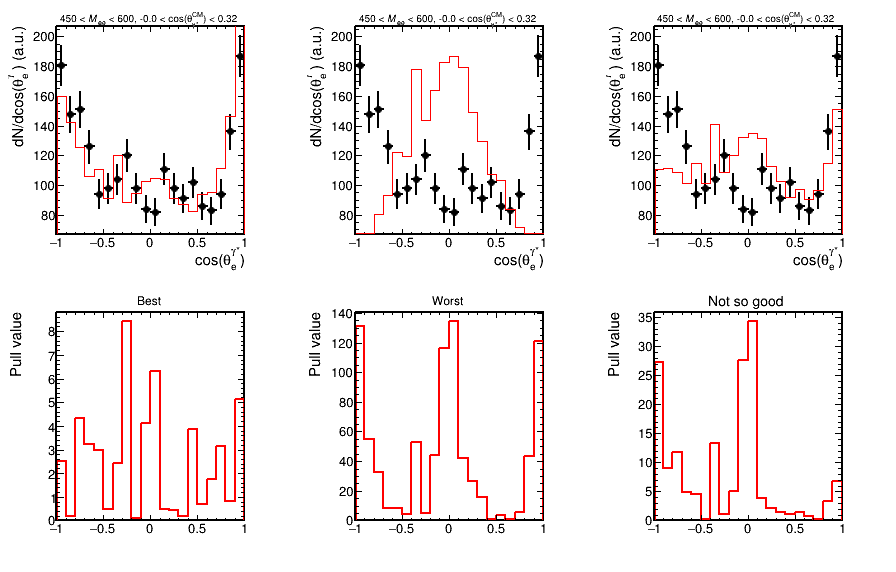

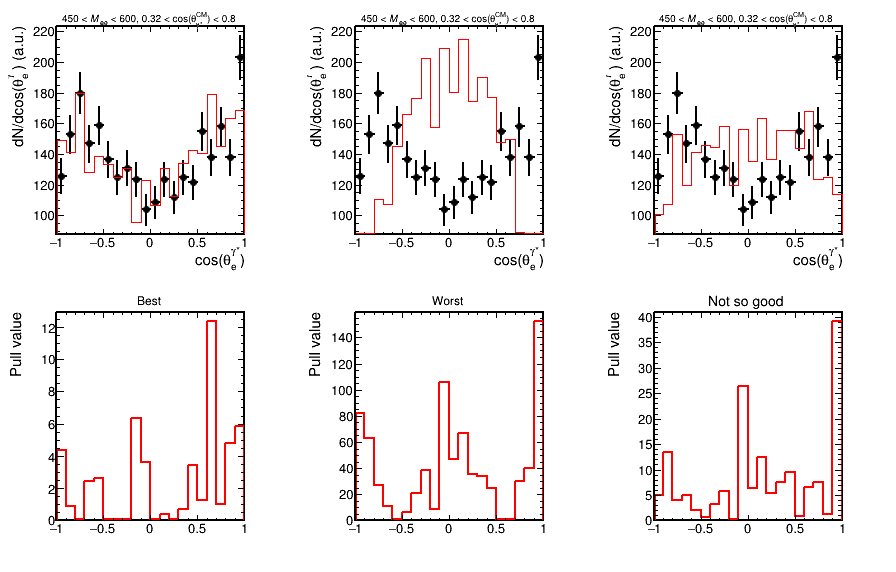

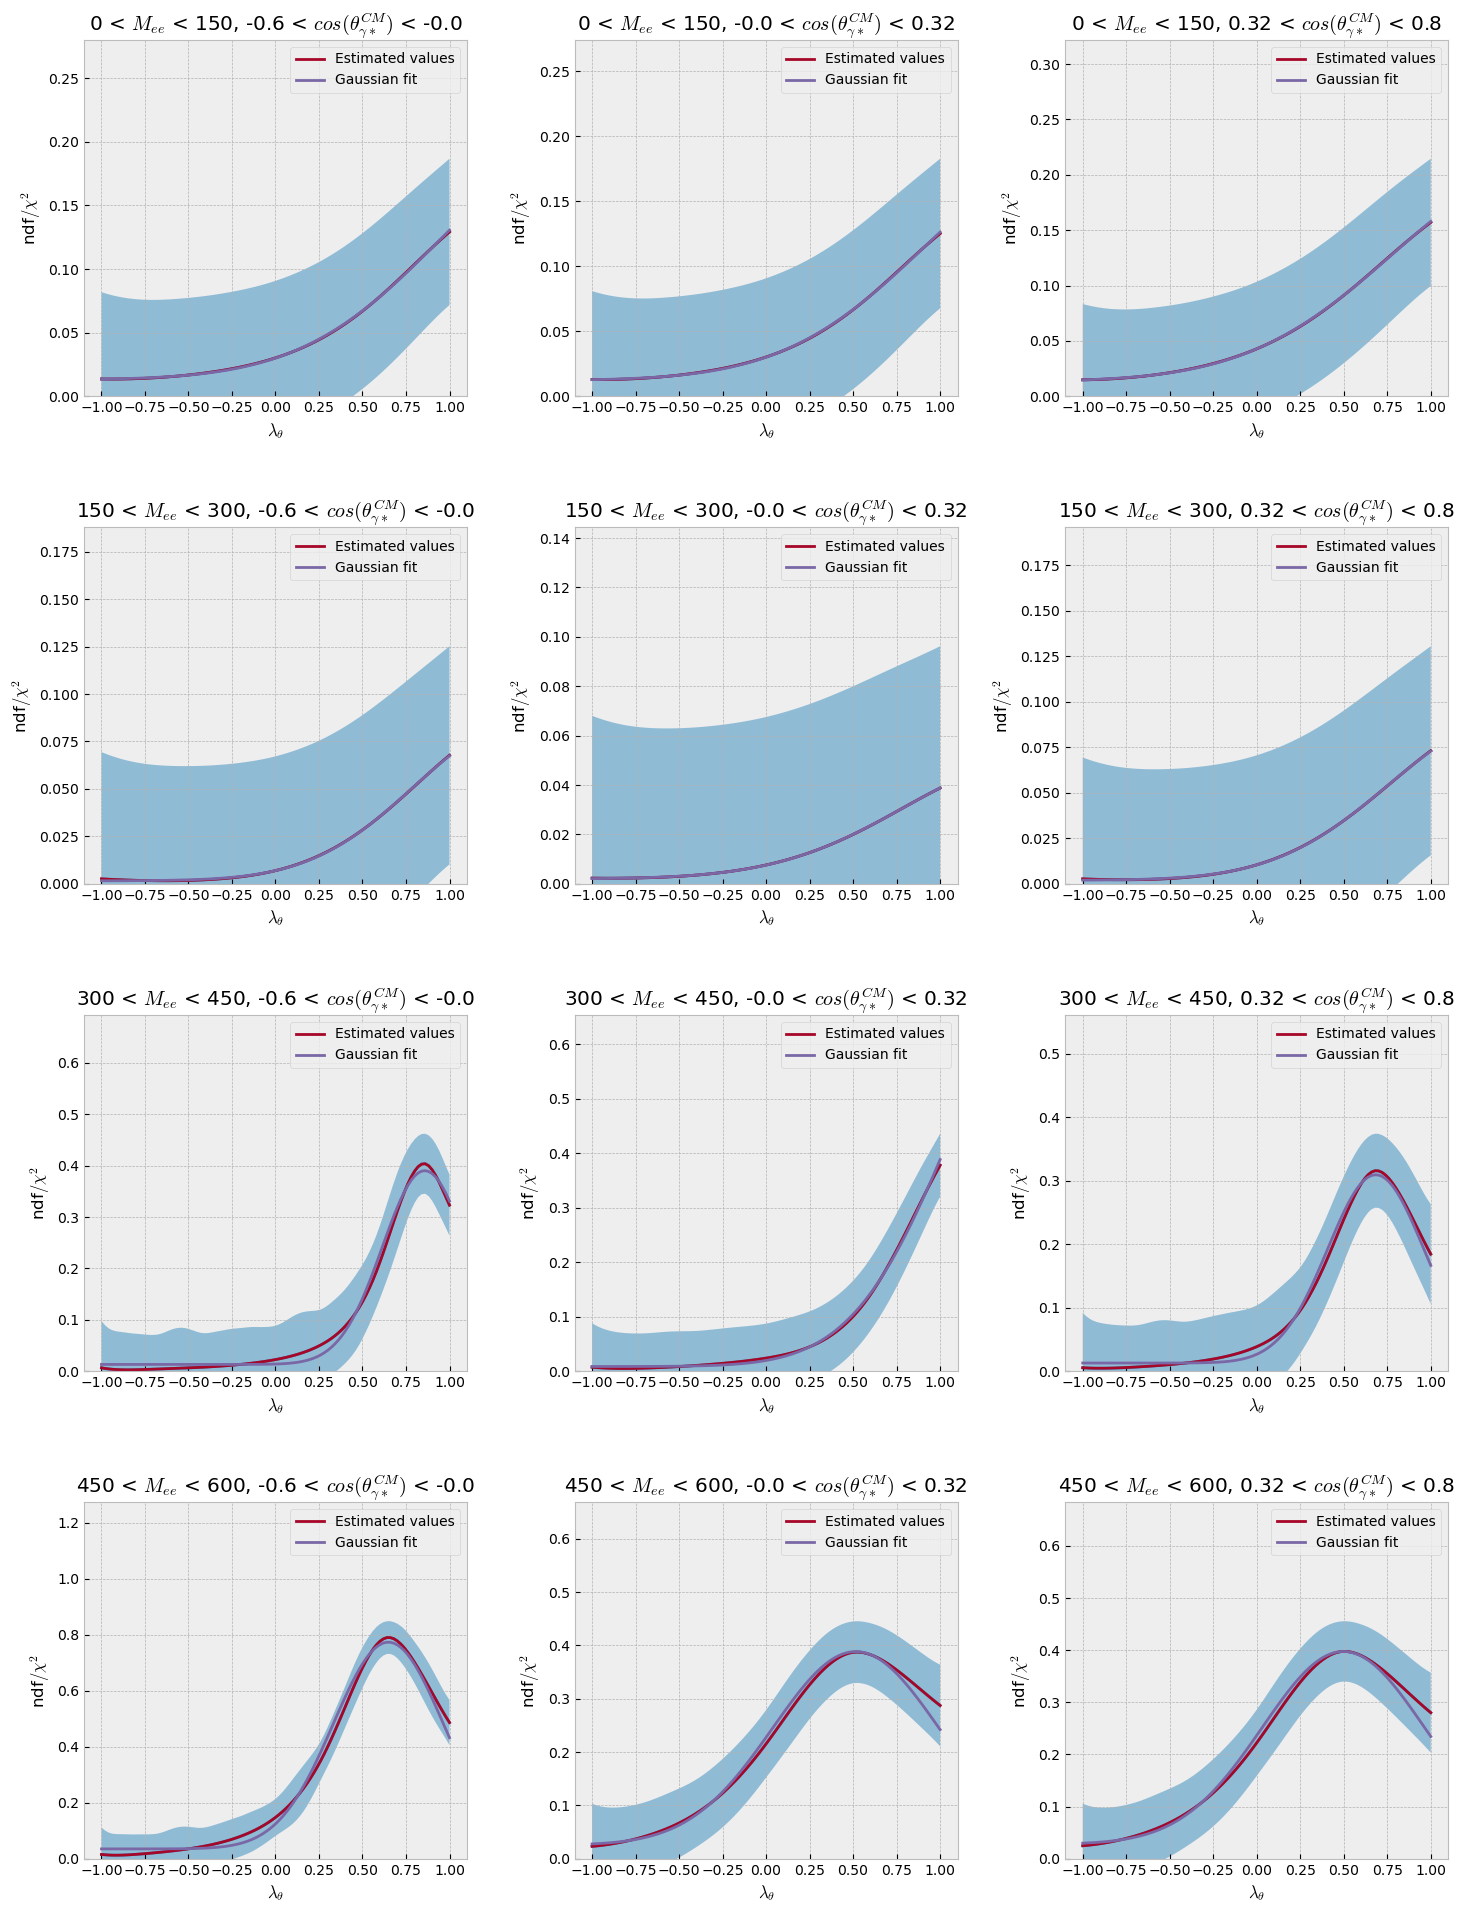

In [16]:

with open(f'{DIR_NAME}/results.txt', 'w') as fout:
    canvases = []
    hdiffs = []
    hmodels = []
    
    fig, ax = plt.subplots(nrows=4, ncols=3)
    fig.tight_layout()
    fig.set_figheight(20)
    fig.set_figwidth(15)
   # fig, ax = plt.subplots(nrows=1, ncols=1)
    
    for HIST_INDEX in range_used:

        c_sorted = c_sorted_all[HIST_INDEX - range_used.start]
        train_x_sorted = train_x_sorted_all[HIST_INDEX - range_used.start]
        predictive_mean = predictive_mean_all[HIST_INDEX - range_used.start]
        predictive_lower = predictive_lower_all[HIST_INDEX - range_used.start]
        predictive_upper = predictive_upper_all[HIST_INDEX - range_used.start]
        predictive_mean_2 = predictive_mean - predictive_mean.min()

       # ax = plt.axes()
       # fig, ax = plt.subplots(nrows=1, ncols=1)
        lambda_theta = train_x_sorted[-1]
        bestHistsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
        hmodels.append(bestHistsMC[0][HIST_INDEX])
        
        can1 = TCanvas(f"can_cmp_{HIST_INDEX}","can",900,600)
        can1.Divide(3,2)
        can1.Draw()        
        canvases.append(can1)
        
        hdiff1 = plotComparison(can1, 1, 4, bestHistsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX], HIST_INDEX, "Best")
        hdiffs.append(hdiff1)
        
        lambda_theta = train_x_sorted[0]
        worstHistsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
        hmodels.append(worstHistsMC[0][HIST_INDEX])
        hdiff2 = plotComparison(can1, 2, 5, worstHistsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX], HIST_INDEX, "Worst")
        hdiffs.append(hdiff2)

        shift = 0.75
        if train_x_sorted[-1] > shift - 1:
            diffToBest = torch.tensor([-shift])
        else:
            diffToBest = torch.tensor([+shift])
        lambda_theta = train_x_sorted[-1] + diffToBest
        notSoGoodHistsMC = getHistMakerMC(HIST_INDEX).makeHists(lambda_theta)
        hmodels.append(notSoGoodHistsMC[0][HIST_INDEX])
        hdiff22 = plotComparison(can1, 3, 6, notSoGoodHistsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX], HIST_INDEX, "Not so good")
        hdiffs.append(hdiff22)

        can1.SaveAs(f"{DIR_NAME}/comparison_{HIST_INDEX}.gif")

        mean, width = covariance_fit_scipy(predictive_mean,predictive_lower,predictive_upper,train_x_sorted[-1],HIST_INDEX,ax[HIST_INDEX // 3][HIST_INDEX % 3])

        print(str(HIST_INDEX) + ": Final result:")
        print(str(HIST_INDEX) + ": Final result:", file=fout)
        print(str(HIST_INDEX) + ": lambda_theta = ", c_sorted[-1][1].item(), " or ", mean)
        print(str(HIST_INDEX) + ": lambda_theta = ", c_sorted[-1][1].item(), " or ", mean, file=fout)

        n, varX2, sigma2 = xAxisProperties(bestHistsMC[0][HIST_INDEX], histsData_np[0][HIST_INDEX])

        try:
            print("Error ingredients: ", n, varX2, sigma2)
            print(str(HIST_INDEX) + ": errors = ", width/math.sqrt(1.0*n), " or ", math.sqrt(sigma2 / varX2), " or ", width)
            print(str(HIST_INDEX) + ": errors = ", width/math.sqrt(1.0*n), " or ", math.sqrt(sigma2 / varX2), " or ", width, file=fout)
        except:
            print(str(HIST_INDEX) + ": errors could not be determined")
            print(str(HIST_INDEX) + ": errors could not be determined", file=fout)

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_0.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_1.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_3.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_4.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_6.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_7.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_8.gif has been 

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_0.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_1.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_2.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_3.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_4.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_5.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_6.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_7.gif has been created
Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/comparison_8.gif has been 

#2 [[<cppyy.gbl.TH1F object at 0x455ccf870>, <cppyy.gbl.TH1F object at 0x455ccfc60>, <cppyy.gbl.TH1F object at 0x455ccead0>, <cppyy.gbl.TH1F object at 0x455cceec0>, <cppyy.gbl.TH1F object at 0x455cca080>, <cppyy.gbl.TH1F object at 0x455cd0430>, <cppyy.gbl.TH1F object at 0x455cd0820>, <cppyy.gbl.TH1F object at 0x455cd0c10>, <cppyy.gbl.TH1F object at 0x455cd1000>, <cppyy.gbl.TH1F object at 0x455cd13f0>, <cppyy.gbl.TH1F object at 0x455cd17e0>, <cppyy.gbl.TH1F object at 0x455cd1bd0>], [<cppyy.gbl.TH1F object at 0x1617807d0>, <cppyy.gbl.TH1F object at 0x161781150>], [<cppyy.gbl.TH1F object at 0x161780bc0>, <cppyy.gbl.TH1F object at 0x1617816e0>]]
#2 [[<cppyy.gbl.TH1F object at 0x461e6cbe0>, <cppyy.gbl.TH1F object at 0x461e6cfd0>, <cppyy.gbl.TH1F object at 0x461e6bbd0>, <cppyy.gbl.TH1F object at 0x461e6bfc0>, <cppyy.gbl.TH1F object at 0x461e6d470>, <cppyy.gbl.TH1F object at 0x461e6d860>, <cppyy.gbl.TH1F object at 0x461e6dc50>, <cppyy.gbl.TH1F object at 0x461e6e040>, <cppyy.gbl.TH1F object at

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/fit_classic.gif has been created
Info in <TCanvas::Print>: pdf file results_sameevt_nu15_noise1em1_1d_ag1580ag/fit_classic.pdf has been created


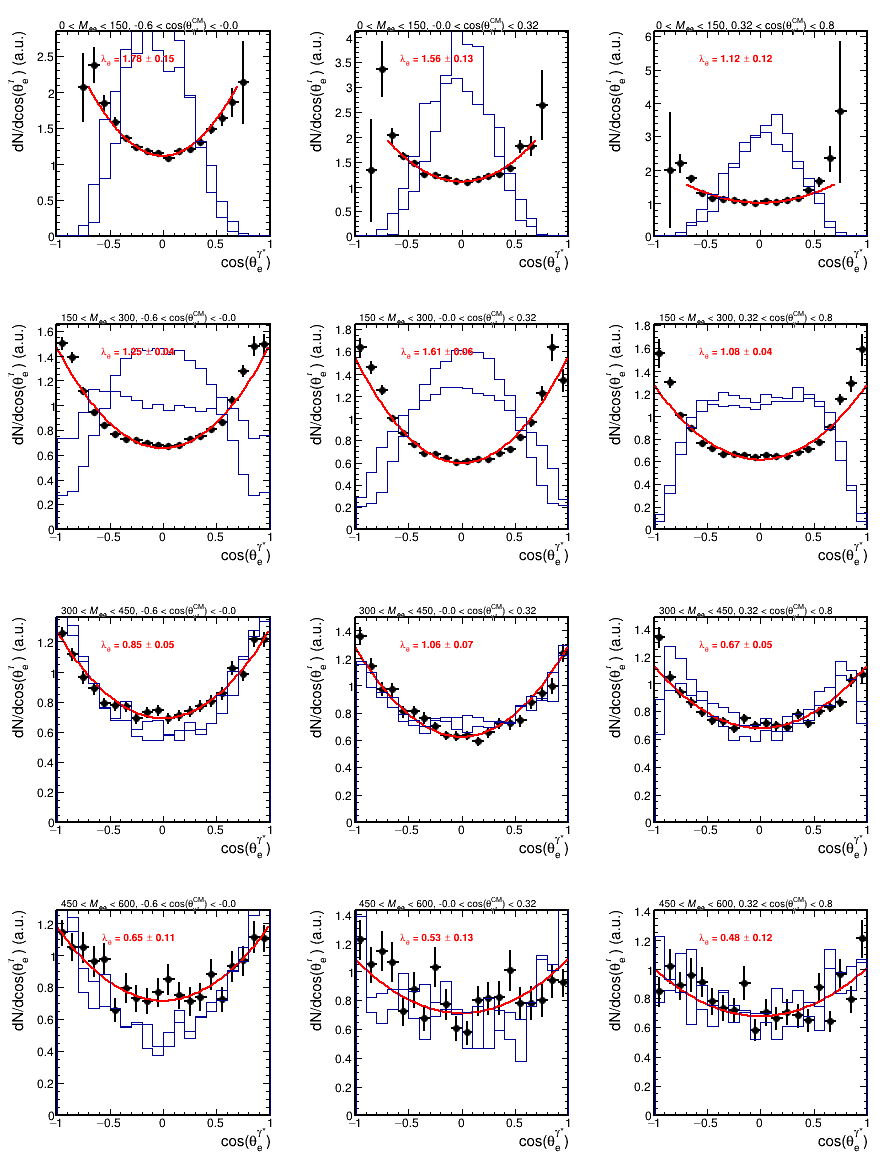

In [17]:
histsDataCorrs = []
hmodelLowM_null = histMakerMC_rho.makeHists((0.0))
hmodelLowM_null_mix = histMakerMC_mix.makeHists((0.0))
hmodelLowM_null_pi0 = histMakerMC_pi0.makeHists((0.0))
pol2s = []
paveTexts = []
histsAvg = []

cc4 = TCanvas("cc4","cc4",900,1200)
cc4.Divide(3,4)
cc4.Draw()
for i, hist in enumerate(histsData_np[0]):
    
    hist_pp = histsData_pp[0][i]
    hist_nn = histsData_nn[0][i]
    histAvg = geomAvg1d(hist_pp, hist_nn, 0.2)
    histsAvg.append(histAvg)

    pad = cc4.cd(i+1)
    setPad(pad)
    if not isinstance(hist, list):
        histCorr = hist.Clone(hist.GetName() + "_corr")
        histsDataCorrs.append(histCorr)
        histCorr.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
        
       # histCorr.Add(hist_pp, -1)
       # histCorr.Add(hist_nn, -1)
       # histCorr.Add(histAvg,-1)
        
        if event_mixing:
            histCorr.Divide(hmodelLowM_null_mix[0][i])
            histAvg.Divide(hmodelLowM_null_mix[0][i])
           # hist_pp.Divide(hmodelLowM_null_mix[0][i])
           # hist_nn.Divide(hmodelLowM_null_mix[0][i])
        else:
            if i < 3:
                histCorr.Divide(hmodelLowM_null_pi0[0][i])
                histAvg.Divide(hmodelLowM_null_pi0[0][i])
               # hist_pp.Divide(hmodelLowM_null_pi0[0][i])
               # hist_nn.Divide(hmodelLowM_null_pi0[0][i])
            else:
                histCorr.Divide(hmodelLowM_null[0][i])
                histAvg.Divide(hmodelLowM_null[0][i])
               # hist_pp.Divide(hmodelLowM_null[0][i])
               # hist_nn.Divide(hmodelLowM_null[0][i])
        hist_pp.Scale(histCorr.Integral()/hist_pp.Integral())
        hist_nn.Scale(histCorr.Integral()/hist_nn.Integral())
       # print(f"{i} creating fit function")
        fit = TF1(f"fit_{i}", "[0]*(1+[1]*x*x)",-1,1)
        fit.SetParameters(1, 1)
        
        if i < 3:
            histCorr.Fit(fit,"Q","", -0.7, 0.7)
        else:
            histCorr.Fit(fit,"Q")
        pol2s.append(fit)
            
        setTH1(histCorr, histCorr.GetXaxis().GetTitle(), f"dN/d{histCorr.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
        histCorr.Draw()
       # histCorr.GetYaxis().SetRangeUser(0,2.5)
        histCorr.SetMinimum(0)
        
       # histAvg.Draw("SAMEHIST")
        hist_pp.Draw("SAMEHIST")
        hist_nn.Draw("SAMEHIST")

        caption = f"#lambda_{{#theta}} = {fit.GetParameter(1):.2f} #pm {fit.GetParError(1):.2f}"
        paveText = setOPT_text(caption, 0.25,0.76,0.675,0.88, 2, 0.04)
        paveTexts.append(paveText)
        
       # print("i = ", i)
       # for k in range(1, histAvg.GetNbinsX()):
       #     print ("bin: ", k, ", content: ", histAvg.GetBinContent(k))
        
    else:
        print(hist)
        

cc4.SaveAs(f"{DIR_NAME}/fit_classic.gif")
cc4.SaveAs(f"{DIR_NAME}/fit_classic.pdf")

#2 [[<cppyy.gbl.TH1F object at 0x451ee1bd0>, <cppyy.gbl.TH1F object at 0x451ee1fc0>, <cppyy.gbl.TH1F object at 0x451ee23b0>, <cppyy.gbl.TH1F object at 0x451ee27a0>, <cppyy.gbl.TH1F object at 0x451ee2b90>, <cppyy.gbl.TH1F object at 0x451ee2f80>, <cppyy.gbl.TH1F object at 0x451ee3370>, <cppyy.gbl.TH1F object at 0x451ee3760>, <cppyy.gbl.TH1F object at 0x451ee3b50>, <cppyy.gbl.TH1F object at 0x451ee3f40>, <cppyy.gbl.TH1F object at 0x451ee4330>, <cppyy.gbl.TH1F object at 0x451ee4720>], [<cppyy.gbl.TH1F object at 0x1617807d0>, <cppyy.gbl.TH1F object at 0x161781150>], [<cppyy.gbl.TH1F object at 0x161780bc0>, <cppyy.gbl.TH1F object at 0x1617816e0>]]
#2 [[<cppyy.gbl.TH1F object at 0x44adcde40>, <cppyy.gbl.TH1F object at 0x44add63e0>, <cppyy.gbl.TH1F object at 0x44add67d0>, <cppyy.gbl.TH1F object at 0x44add6bc0>, <cppyy.gbl.TH1F object at 0x44add6fb0>, <cppyy.gbl.TH1F object at 0x44add76c0>, <cppyy.gbl.TH1F object at 0x44add7ab0>, <cppyy.gbl.TH1F object at 0x44add7ea0>, <cppyy.gbl.TH1F object at

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/cmp_mass_z.gif has been created


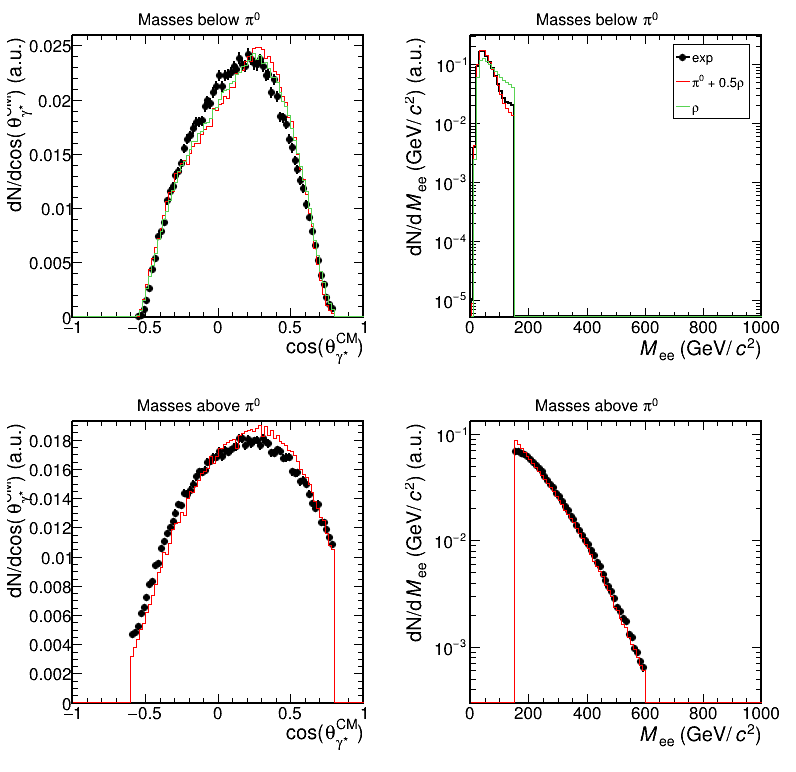

In [18]:
hmodelLowM_rho = histMakerMC_mix.makeHists((1.0)) if event_mixing else histMakerMC_rho.makeHists((1.0))
hmodelLowM_rho[2][0].SetLineColor(8)
hmodelLowM_rho[1][0].SetLineColor(8)

hmodelLowM = histMakerMC_pi0.makeHists((1.0))

fraction = 0.5

hmodelLowM[2][0].Scale(1.0/hmodelLowM[2][0].Integral())
hmodelLowM[1][0].Scale(1.0/hmodelLowM[1][0].Integral())
hmodelLowM_rho[2][0].Scale(1.0/hmodelLowM_rho[2][0].Integral())
hmodelLowM_rho[1][0].Scale(1.0/hmodelLowM_rho[1][0].Integral())

hmodelLowM[2][0].Add(hmodelLowM_rho[2][0], fraction)
hmodelLowM[1][0].Add(hmodelLowM_rho[1][0], fraction)

hmodelLowM[2][0].SetLineColor(2)
hmodelLowM[1][0].SetLineColor(2)
hmodelHigM = getHistMakerMC(3).makeHists(1.0)
hmodelHigM[2][1].SetLineColor(2)
hmodelHigM[1][1].SetLineColor(2)

cc = TCanvas("cc","cc",800,800)
cc.Divide(2,2)
cc.Draw()

pad = cc.cd(1)
setPad(pad)
dataScale = 1./histsData_np[2][0].Integral()
histsData_np[2][0].Scale(dataScale)
histsData_pp[2][0].Scale(dataScale)
histsData_nn[2][0].Scale(dataScale)
hmodelLowM[2][0].Scale(1./hmodelLowM[2][0].Integral())
hmodelLowM_rho[2][0].Scale(1./hmodelLowM_rho[2][0].Integral())
histsData_np[2][0].GetXaxis().SetTitle("cos(#theta^{CM}_{#gamma*})")
histsData_np[2][0].SetTitle("Masses below #pi^{0}")

setTH1(histsData_np[2][0], histsData_np[2][0].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[2][0].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[2][0].Draw()
#histsData_pp[2][0].Draw("SAME")
#histsData_nn[2][0].Draw("SAME")
hmodelLowM[2][0].Draw("SAMEHIST")
hmodelLowM_rho[2][0].Draw("SAMEHIST")

pad = cc.cd(2)
pad.SetLogy()
setPad(pad)
histsData_np[1][0].Scale(1./histsData_np[1][0].Integral())
hmodelLowM[1][0].Scale(1./hmodelLowM[1][0].Integral())
hmodelLowM_rho[1][0].Scale(1./hmodelLowM_rho[1][0].Integral())
histsData_np[1][0].SetTitle("Masses below #pi^{0}")
histsData_np[1][0].GetXaxis().SetTitle("#it{M}_{ee} (GeV/#it{c}^{2})")

setTH1(histsData_np[1][0], histsData_np[1][0].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[1][0].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[1][0].Draw("HIST")
hmodelLowM[1][0].Draw("SAMEHIST")
hmodelLowM_rho[1][0].Draw("SAMEHIST")

legend = TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(histsData_np[1][0], "exp", "pl")
legend.AddEntry(hmodelLowM[1][0], f"#pi^{{0}} + {fraction}#rho", "l")
legend.AddEntry(hmodelLowM_rho[1][0], "#rho", "l")
legend.Draw()

pad = cc.cd(3)
setPad(pad)
histsData_np[2][1].Scale(1./histsData_np[2][1].Integral())
hmodelHigM[2][1].Scale(1./hmodelHigM[2][1].Integral())
hmodelLowM_rho[2][1].Scale(1./hmodelLowM_rho[2][1].Integral())
histsData_np[2][1].GetXaxis().SetTitle("cos(#theta^{CM}_{#gamma*})")
histsData_np[2][1].SetTitle("Masses above #pi^{0}")

setTH1(histsData_np[2][1], histsData_np[2][1].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[2][1].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[2][1].Draw()
hmodelHigM[2][1].Draw("SAMEHIST")
#hmodelLowM_rho[2][1].Draw("SAMEHIST")

pad = cc.cd(4)
pad.SetLogy()
setPad(pad)
histsData_np[1][1].Scale(1./histsData_np[1][1].Integral())
hmodelHigM[1][1].Scale(1./hmodelHigM[1][1].Integral())
hmodelLowM_rho[1][1].Scale(1./hmodelLowM_rho[1][1].Integral())
histsData_np[1][1].GetXaxis().SetTitle("#it{M}_{ee} (GeV/#it{c}^{2})")
histsData_np[1][1].SetTitle("Masses above #pi^{0}")

setTH1(histsData_np[1][1], histsData_np[1][1].GetXaxis().GetTitle(), 
       f"dN/d{histsData_np[1][1].GetXaxis().GetTitle()} (a.u.)", 505, 20, 0.8, 1)
histsData_np[1][1].Draw()
hmodelHigM[1][1].Draw("SAMEHIST")
#hmodelLowM_rho[1][1].Draw("SAMEHIST")

cc.SaveAs(f"{DIR_NAME}/cmp_mass_z.gif")

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/kfactor.gif has been created


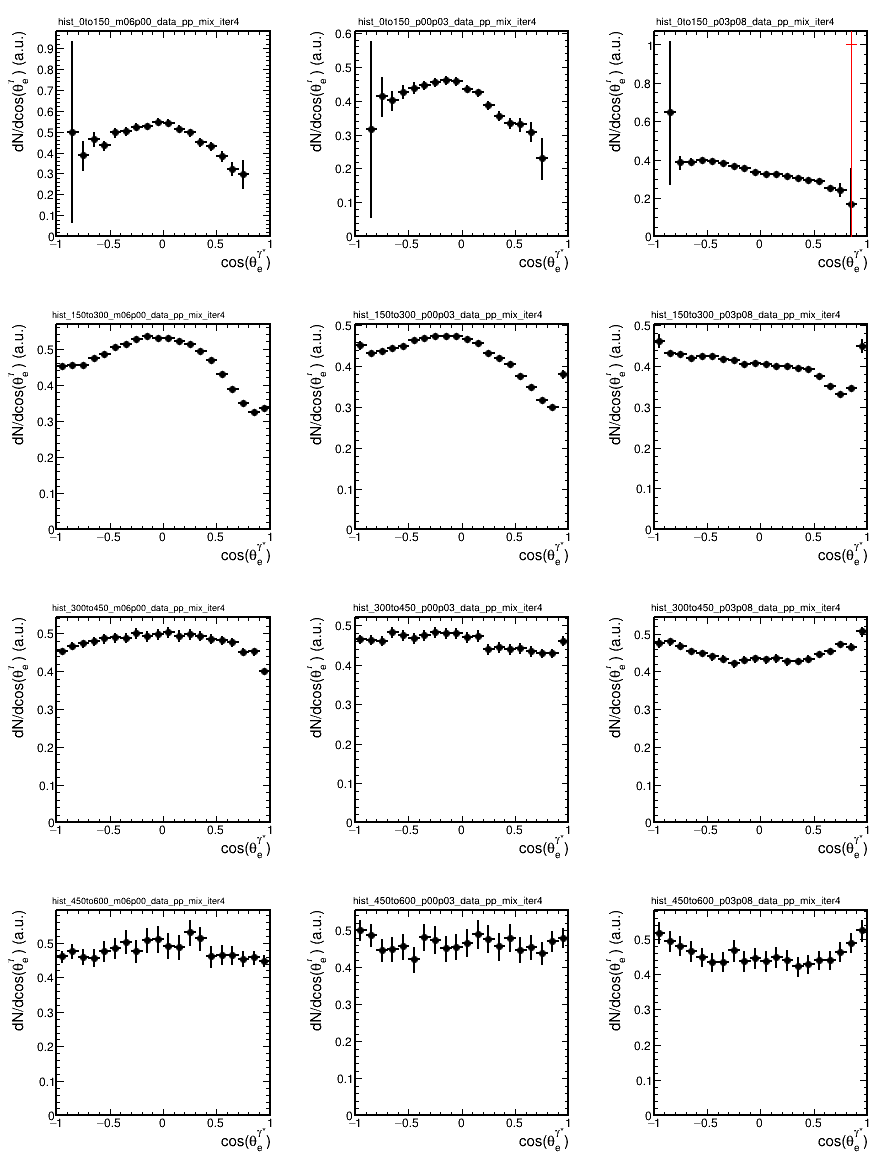

In [19]:
kfactors = []

cck = TCanvas("cck","cck",900,1200)
cck.Divide(3,4)
cck.Draw()
for i, hist in enumerate(histsData_np[0]):
    
    hist_np_mix = histsData_np_mix[0][i]
    hist_pp_mix = histsData_pp_mix[0][i]
    hist_nn_mix = histsData_nn_mix[0][i]

    histAvg = geomAvg1d(hist_pp_mix, hist_nn_mix, 0.2)
    hist_np_mix.Divide(histAvg)
    kfactors.append(hist_np_mix)

    pad = cck.cd(i+1)
    setPad(pad)
    if not isinstance(hist, list):
        hist_np_mix.GetXaxis().SetTitle("cos(#theta_{e}^{#gamma*})")
        
        setTH1(hist_np_mix, histCorr.GetXaxis().GetTitle(), f"dN/d{histCorr.GetXaxis().GetTitle()} (a.u.)", 
               505, 20, 0.8, 1)
        hist_pp_mix.SetLineColor(2)
        hist_nn_mix.SetLineColor(4)
        hist_pp_mix.SetMarkerColor(2)
        hist_nn_mix.SetMarkerColor(4)
        hist_np_mix.Draw()
        hist_pp_mix.Draw("SAME")
        hist_nn_mix.Draw("SAME")
        hist_np_mix.SetMinimum(0)
        
    else:
        print(hist)
        

cck.SaveAs(f"{DIR_NAME}/kfactor.gif")

Info in <TCanvas::Print>: gif file results_sameevt_nu15_noise1em1_1d_ag1580ag/kfactor.gif has been created
